In [1]:
import os
os.environ['TRANSFORMERS_OFFLINE'] = '1'
import torch
from transformers import AutoTokenizer
from models import *
from config import *
from utils import *

tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-uncased')

In [2]:
config = SimpleDecoderOnlyTransformerConfig(vocab_size=tokenizer.vocab_size)

config_check(config)
# Load models trained with Trainer
model = DecoderOnlyTransformer.from_pretrained('./ckpts/DecoderOnlyTransformer').to(config.device)

# Load models trained with plain methods (state_dict in pth/pt file)
# model = DecoderOnlyTransformer(config).to(config.device)
# model.load_state_dict(torch.load('ckpts/DecoderOnlyTransformer.pth', weights_only=True), strict=False)

model.apply_attention_map()

CONFIG:SimpleDecoderOnlyTransformerConfig {
  "device": "cuda",
  "dropout": 0.1,
  "eps": 1e-06,
  "flash_attn": false,
  "hidden_size": 768,
  "intermediate_size": 3072,
  "max_seq_len": 64,
  "model_type": "simple_decoder_only_transformer",
  "n_layers": 12,
  "num_attention_heads": 12,
  "transformers_version": "4.46.1",
  "vocab_size": 30522
}

Model Parameters: 160,315,194
Attention_map is now supported! This may cause unnecessary memory consumption if you are not conducting a visualization.


In [5]:
context = "the company"
input_idx = tokenizer(context, return_tensors='pt')['input_ids'][:, 1:-1].repeat(5, 1).to(config.device)
# input_idx = tokenizer(context, return_tensors='pt')['input_ids'].repeat(5, 1).to(config.device)
generated_idx = model.generate(input_idx, max_new_tokens=100, temperature=0.75)
generated_text = [''.join(tokenizer.decode(x)) for x in generated_idx.tolist()]
generated_text

["the company said that as the n summit in n itv and tim new zealand ' s goal right to be a homosexual returned to an an old court adjournment until june # #. two young clubs who ploughed clean up the clean water act contains # #, # # # points on a four - goal first division. a strike by opposition parties in kenya at the weekend was extended by another day wednesday until # # # #, an official said. a swedish prosecutor called wednesday for a # #",
 'the company said earnings in the four employees would be lower in the five months. the trial in ouagadougou of mali, accused of a coup # # years ago, opened here tuesday what was expected to be a stormy but smooth confirmation. a government team from the # # - year - old parliament in mauritius has won the nomination by a < unk > of # # # members to a # # # - seat passenger center. a republican lawmaker has named a us resident, after to george',
 "the company said earnings in the four employees of national higher commercial bank with the <

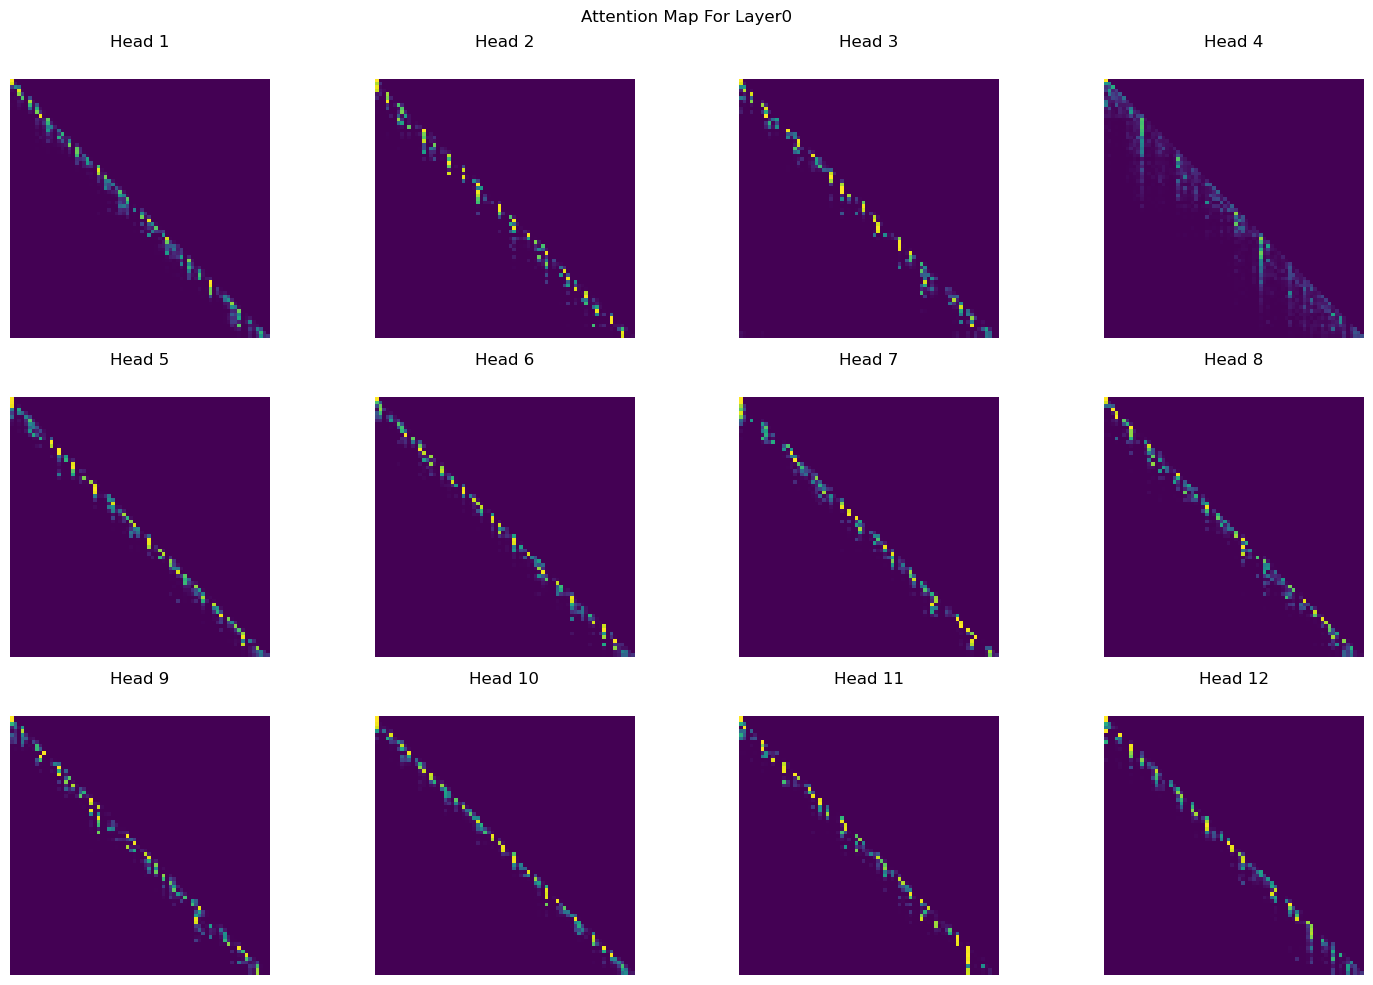

In [4]:
plot_attention(model, layer=0, batch_idx=0)